# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zhihao

Last Name: Meng

Student ID: 915537642

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests

In [2]:
def ndb_search(term):
    response = requests.get("https://api.nal.usda.gov/ndb/search",params={
        "api_key": "rQAOXfp2b9M9rXslvLzMUvl1H7nKvNLbOBaGHoND",
        "q":term,
        "format": "JSON"
    })
    response.raise_for_status()
    response = response.json()
    return response

In [3]:
ndb_search('quail eggs')

{'list': {'ds': 'any',
  'end': 6,
  'group': '',
  'item': [{'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
    'ndbno': '45169279',
    'offset': 0},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
    'ndbno': '45178254',
    'offset': 1},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
    'ndbno': '45094707',
    'offset': 2},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
    'ndbno': '45094890',
    'offset': 3},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
    'ndbno': '45099560',
    'offset': 4},
   {'ds': 'SR',
    'group': 'Dairy and Egg Products',
    'name': 'Egg, quail, whole, fresh, raw',
    'ndbno': '01140',
 

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [4]:
import numpy as np
import pandas as pd

In [5]:
food = pd.read_csv('/Users/HP/sta141b-hw4-Zhihao2018/fresh.csv',header = 0)
food = pd.DataFrame(food)

In [6]:
food

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit


In [7]:
def ndbno(i): #Find the unbranded, raw food.
    i_item = pd.DataFrame(ndb_search(food['food'][i])['list']['item']) 
    i_item = i_item[i_item.ds != 'BL']
    raw = i_item.name.str.contains(', raw')
    i_item = i_item.loc[raw,:]
    return i_item
ndb = pd.DataFrame()
for i in range(0,len(food)): #Find the NDB for every food.
    i_item = ndbno(i)
    i_item.name = food['food'][i]
#Seleclt the first NDB from all the NOBs for unbranded and raw food. For the special case cucumber and cabbage, we selcet the first two NDBs.
    if i>1: 
        if food['food'][i]==food['food'][i-1]:
            ndb = ndb.append(i_item[1:2])
        else:
            ndb = ndb.append(i_item[0:1]) 
    else:
        ndb = ndb.append(i_item[0:1])
food_ndb=ndb[['name','ndbno']]
food_ndb.columns=['food','ndbno']
food_w_ndb=pd.merge(food,food_ndb,on='food') #Merge the NDBs with other data.
ndbno=food_w_ndb.copy().ndbno 
#There are duplicated cases because of the two cucumbers and two cabbages.We divide the dataframe into two parts and drop duplicates.
ndbno=ndbno.drop_duplicates()
ndbno.index=range(0,len(ndbno))
foodname=food_w_ndb.copy().drop('ndbno',axis=1)
foodname=foodname.drop_duplicates(['form','food'])
foodname.index=range(0,len(foodname.form))
food_full=foodname.join(ndbno)

In [8]:
food_full

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


Strategies：First, I drop the 'BL' cases in the ds column which means drop all the branded items. Second, I select all the items whose name column have the string ', raw' and drop them, which means select all the raw items. There are many NDBs for some unbranded and raw items. I choose the first NDB of every unbranded and raw item as their NDBs. There are two special items: cucumbers and cabbages, which have two items for each other. So I choose the first two NDBs of every unbranded and raw item as the two items of cucumbers and cabbages. Then I merge the NDB and the whole data, which has duplicates because the repeated items cucumbers and cabbages. Then I divided the merged data into NDB and the other part, drop the duplicated items for the two parts and join them together. I obtain 41 NDBs.

My strategies may obtain most NDBs of all the food. But there may be some omissions because the name descriptions of the food may not be identified as raw food easily.

__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [9]:
def ndb_report(ndb):
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports",params={
        "api_key": "rQAOXfp2b9M9rXslvLzMUvl1H7nKvNLbOBaGHoND",
        "ndbno": ndb,
        #"type": "b",
        "format": "JSON"       
    })
    response.raise_for_status()
    response = response.json()
    return response

In [10]:
ndb_report("09279")

{'api': 2.0,
 'count': 1,
 'foods': [{'food': {'desc': {'ds': 'Standard Reference',
     'manu': '',
     'name': 'Plums, raw',
     'ndbno': '09279',
     'ru': 'g'},
    'footnotes': [],
    'nutrients': [{'derivation': 'NONE',
      'group': 'Proximates',
      'measures': [{'eqv': 165.0,
        'eunit': 'g',
        'label': 'cup, sliced',
        'qty': 1.0,
        'value': '143.93'},
       {'eqv': 66.0,
        'eunit': 'g',
        'label': 'fruit (2-1/8" dia)',
        'qty': 1.0,
        'value': '57.57'},
       {'eqv': 151.0,
        'eunit': 'g',
        'label': 'NLEA serving',
        'qty': 1.0,
        'value': '131.72'}],
      'name': 'Water',
      'nutrient_id': '255',
      'unit': 'g',
      'value': '87.23'},
     {'derivation': 'NC',
      'group': 'Proximates',
      'measures': [{'eqv': 165.0,
        'eunit': 'g',
        'label': 'cup, sliced',
        'qty': 1.0,
        'value': '76'},
       {'eqv': 66.0,
        'eunit': 'g',
        'label': 'fruit (

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [11]:
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
kcal=pd.DataFrame() #Extract the kilocalories of every food.
for j in range(0,len(food_full)):
    k=pd.DataFrame(ndb_report(food_full.ndbno[j])['foods'][0]['food']['nutrients'])
    kcal=kcal.append(k[1:2])
kcal.value=np.float64(kcal.value)
nui=kcal.value
nui.index=range(0,len(kcal.value))
food_w_nui=food_full.copy().join(nui)

Use yield*kilocalories/price as the evaluation criterion. We expect a higher ratio.

In [13]:
ratio=food_w_nui['yield']*food_w_nui['value']/food_w_nui['price_per_lb'] #Use yield*kilocalories/price as the evaluation criterion. We expect a higher ratio.
foodratio=pd.DataFrame({'food':[x for x in food_w_nui['food']],'ratio':[y for y in ratio]},index=range(0,len(ratio)))
foodratio[foodratio['ratio']==max(ratio)]

,food,ratio
30,potatoes,110.69997


In [14]:
foodratio[foodratio['ratio']==min(ratio)]

,food,ratio
23,asparagus,3.073511


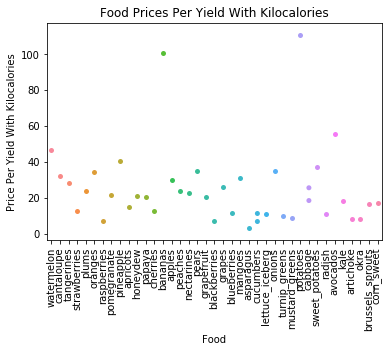

In [15]:
food1=foodratio['food']
ax= sns.stripplot(x =food1, y = ratio)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(title = "Food Prices Per Yield With Kilocalories", xlabel = "Food", ylabel = "Price Per Yield With Kilocalories")
plt.show()

I use kilocalories as the measure of nutrition. And the ratio of (yield*kilocalories/price) is the measure of combination of price, yield and nutrition. From the plot above we can see that potatoes provide the best combination of price, yield and nutrition.